In [160]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [161]:
train=pd.read_excel("train_flight_set.xls")
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [245]:
train.shape
#the data set contains (10682 rows and 13 colums)

(10682, 13)

In [162]:
test=pd.read_excel("test_flight_set.xls")
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [247]:
test.shape
#the test dat set contain 2671 rows and 13 columns

(2671, 13)

In [163]:
pd.set_option("display.max_columns", None)

In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


The data set contain all object value except the price so no need to treat for skew or outliers

In [165]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [166]:
train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
31h 30m      1
27h 30m      1
42h 5m       1
4h 10m       1
3h 25m       1
Name: Duration, Length: 368, dtype: int64

In [167]:
train.shape

(10683, 11)

In [168]:
test.shape

(2671, 10)

In [169]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#there is null value in Route and Total_stops

There is only minimum value of NAN so we can drop that

In [170]:
train.dropna(inplace=True)

In [171]:
train.shape

(10682, 11)

In [172]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [173]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Here we are separating the day date time and hours

In [174]:
train["Journey_day"]=pd.to_datetime(train.Date_of_Journey,format="%d/%m/%Y").dt.day

In [175]:
train["Journey_month"]=pd.to_datetime(train.Date_of_Journey,format="%d/%m/%Y").dt.month

In [176]:
train.drop(["Date_of_Journey"],axis=1,inplace=True)

In [177]:
train["Dep_hour"]=pd.to_datetime(train.Dep_Time).dt.hour

In [178]:
train["Dep_min"]=pd.to_datetime(train.Dep_Time).dt.minute

In [179]:
train.drop(["Dep_Time"],axis=1,inplace=True)

In [180]:
train["Arrival_hour"]=pd.to_datetime(train.Arrival_Time).dt.hour
train["Arrival_min"]=pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(["Arrival_Time"],axis=1,inplace=True)

In [181]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [182]:
#Assigning and converting Duration column into list

duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [183]:
train["Duration_hours"]=duration_hours
train["Duration_mins"]=duration_mins

In [184]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [207]:
train.drop(["Duration"],axis=1,inplace=True)

In [186]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

One hot encoder is used in this we cant give labeling because each sets are best 

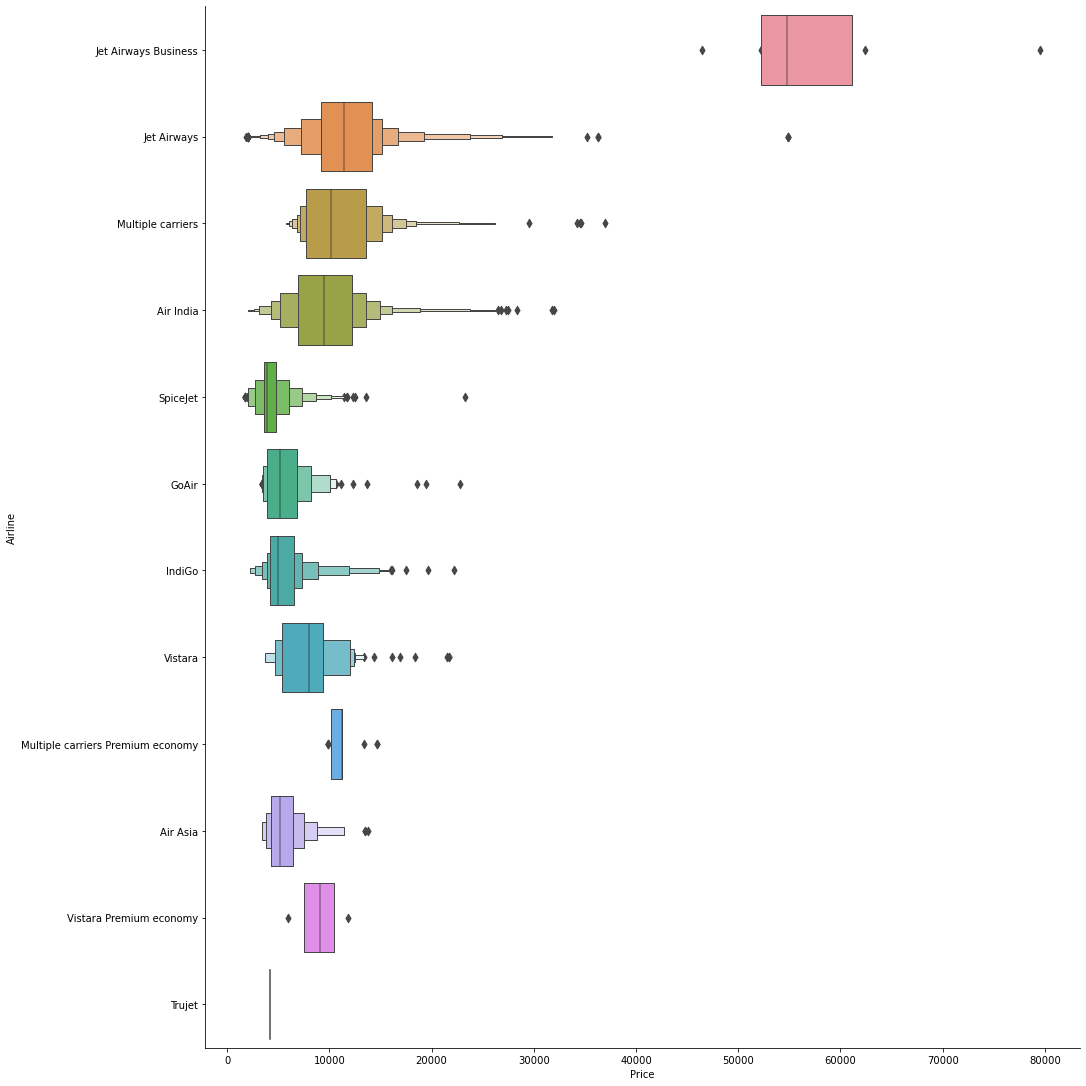

In [187]:
sb.catplot(x="Price",y="Airline",data=train.sort_values("Price", ascending= False), kind="boxen", height = 15, aspect = 1)

In [188]:
Airline = train[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


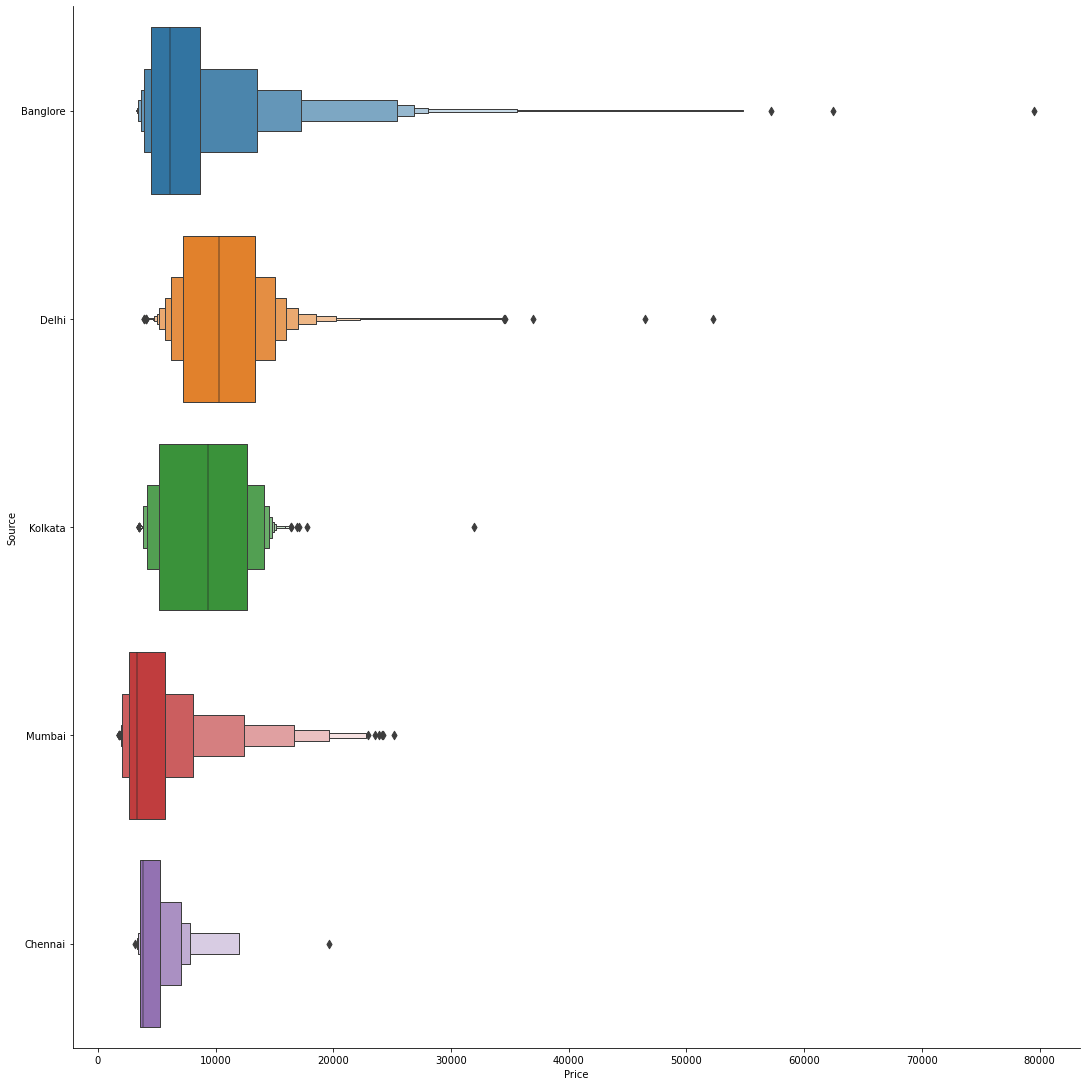

In [189]:
sb.catplot(x="Price",y="Source",data=train.sort_values("Price", ascending= False), kind="boxen", height = 15, aspect = 1)

In [190]:
Source = train[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [192]:
Destination= train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [193]:
train.drop(["Route"],axis=1,inplace= True)

In [194]:
train.drop(["Additional_Info"],axis=1,inplace= True)

In [195]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45


In [198]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [248]:
train.corr()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
Journey_day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940
Journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival_min,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


<AxesSubplot:>

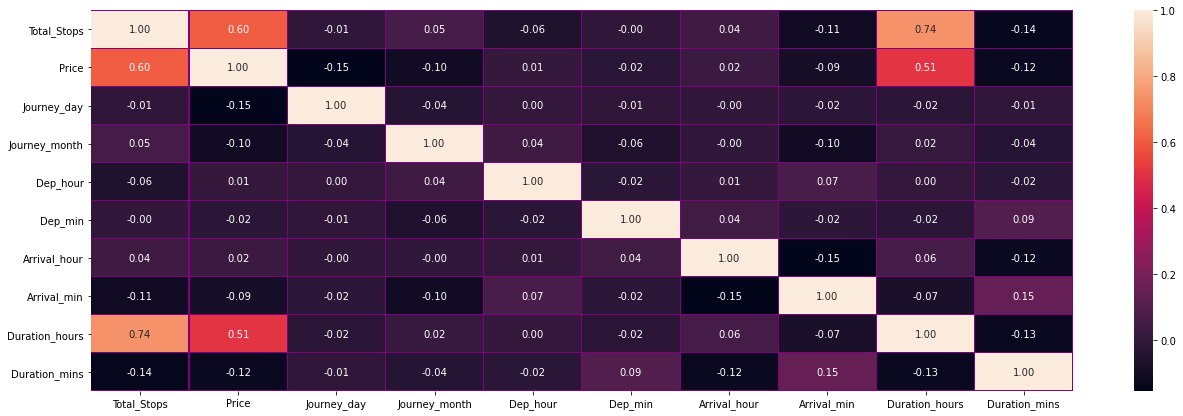

In [249]:
plt.figure(figsize=(22,7))
sb.heatmap(train.corr(),annot=True,linewidths=0.1,linecolor="purple",fmt="0.2f")

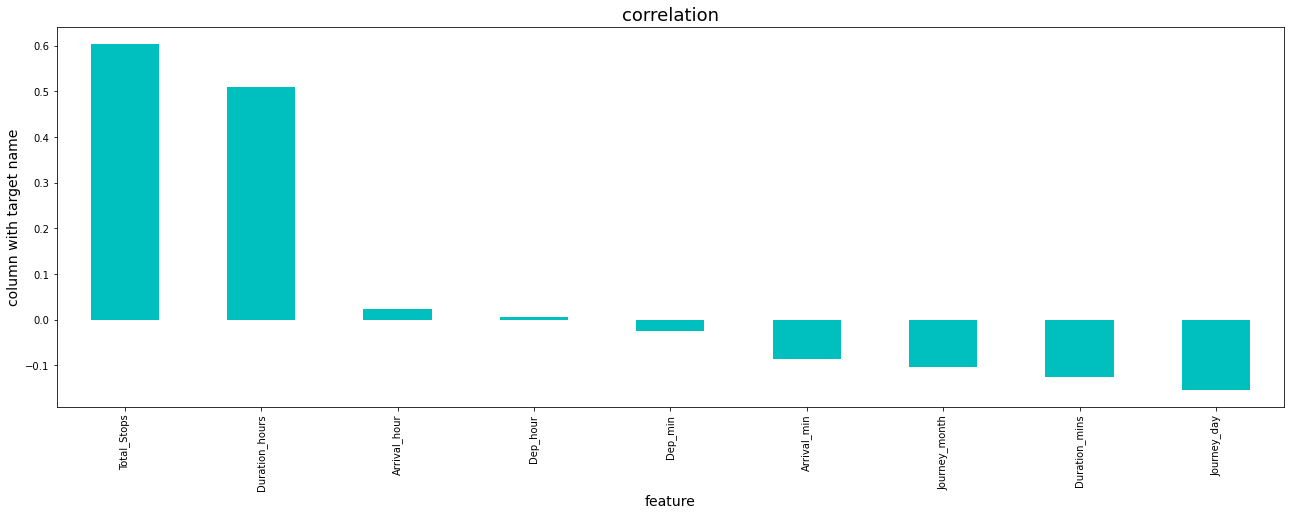

In [250]:
plt.figure(figsize=(22,7))
train.corr()["Price"].sort_values(ascending=False).drop(["Price"]).plot(kind="bar",color="c")
plt.xlabel("feature",fontsize=14)
plt.ylabel("column with target name",fontsize=14)
plt.title("correlation",fontsize=18)
plt.show()

Here we see stops place major roles so made label encoding 

In [199]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [200]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35,4,45


In [209]:
train_data = pd.concat([train, Airline, Source, Destination], axis = 1)

concat the one hot encoder woth train data se and giving out new name 

In [210]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [211]:
train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [212]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [214]:
train_data.shape

(10682, 30)

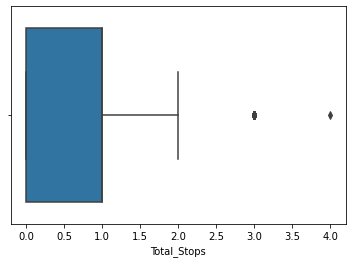

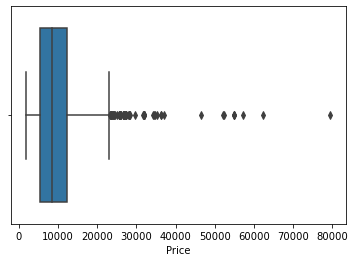

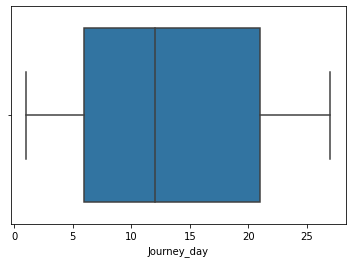

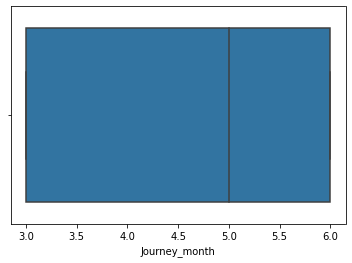

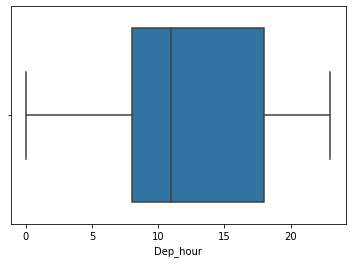

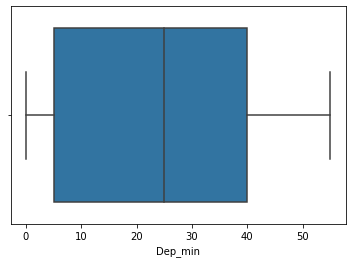

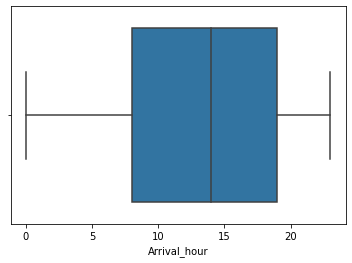

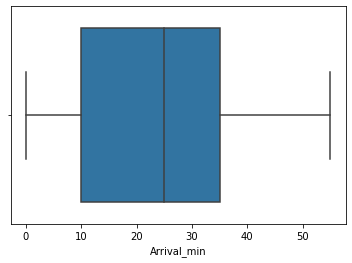

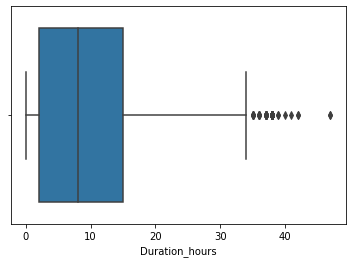

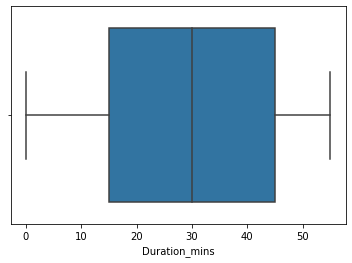

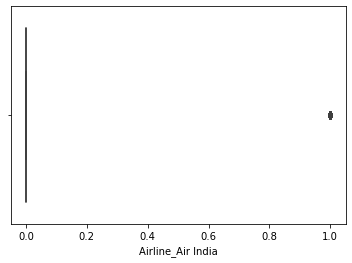

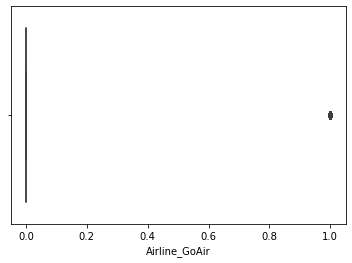

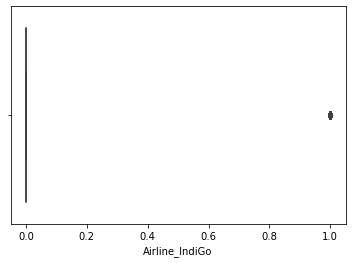

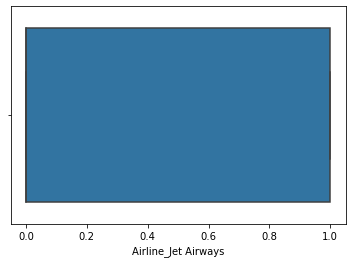

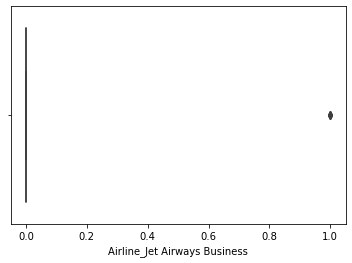

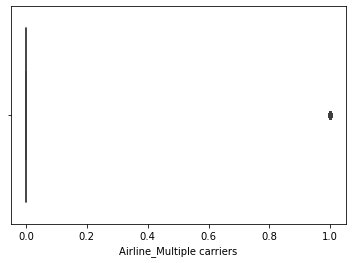

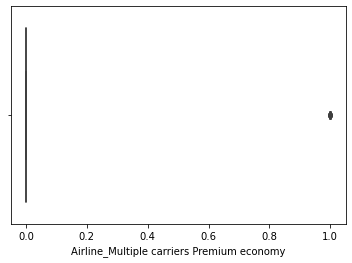

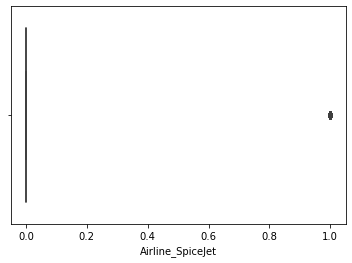

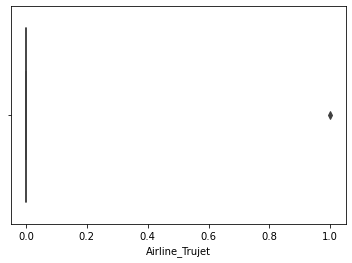

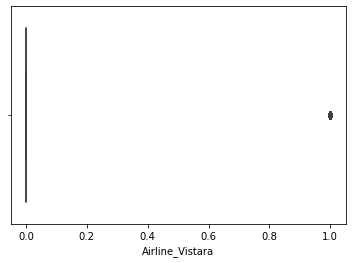

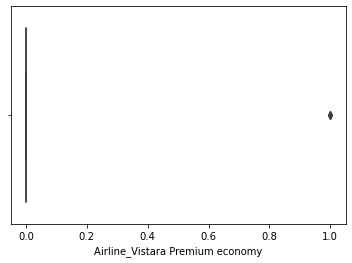

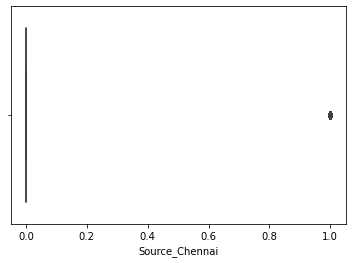

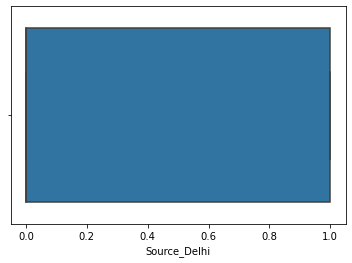

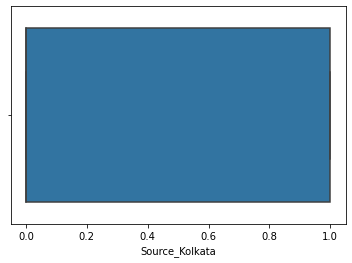

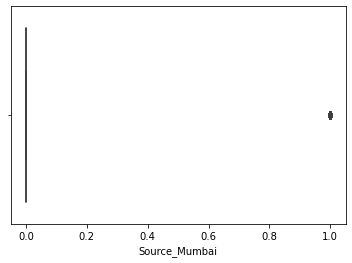

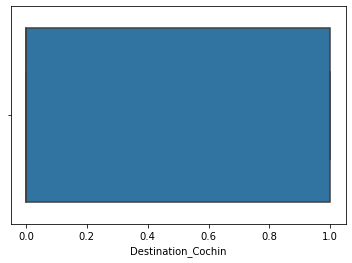

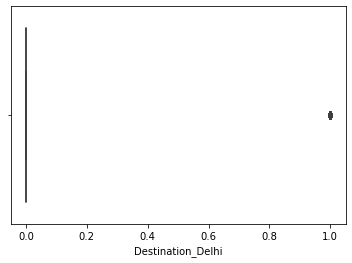

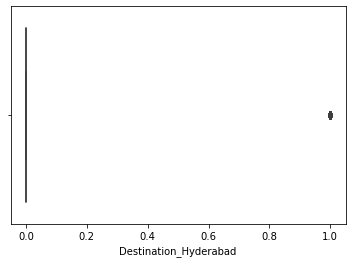

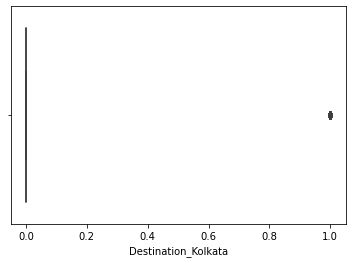

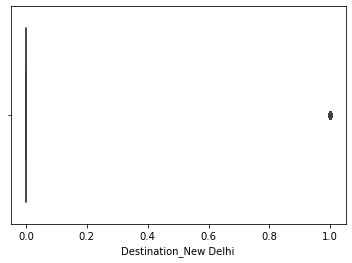

In [239]:

for  i in train_data.columns:
    plt.figure()
    sb.boxplot(train_data[i])

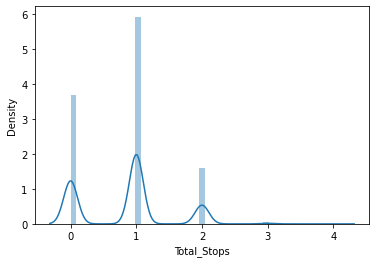

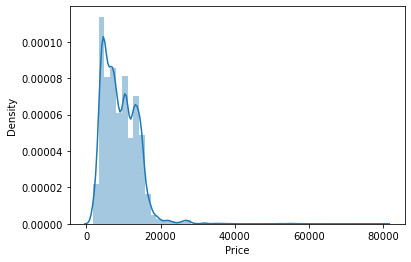

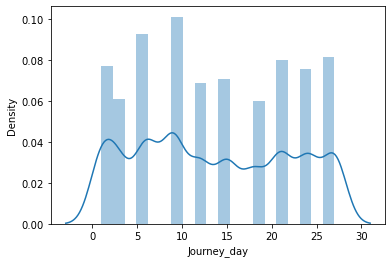

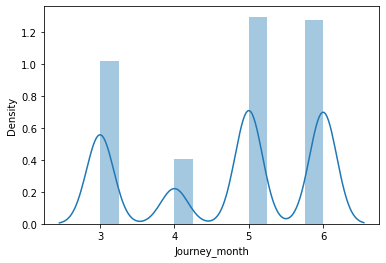

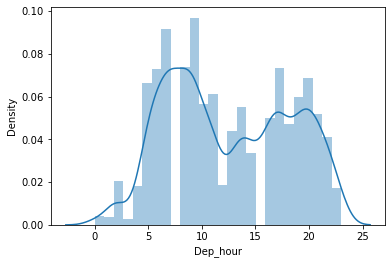

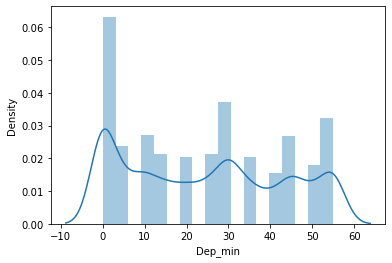

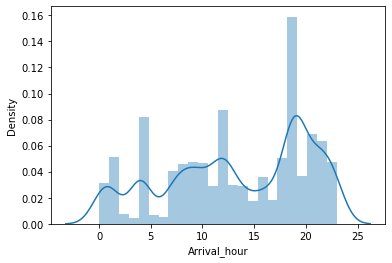

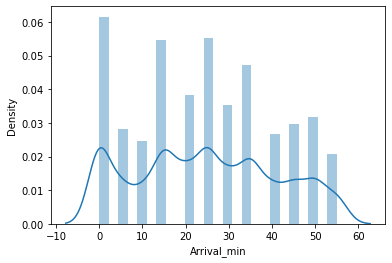

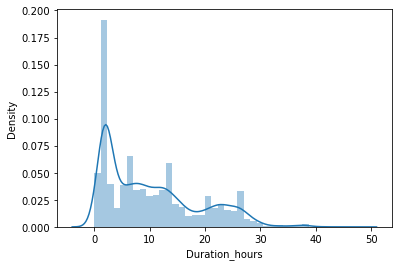

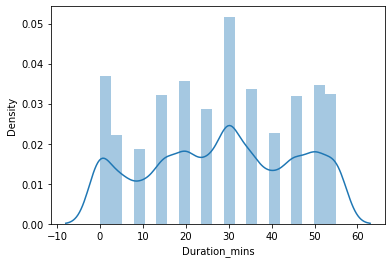

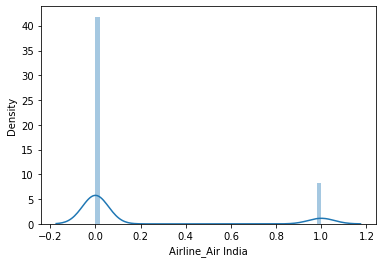

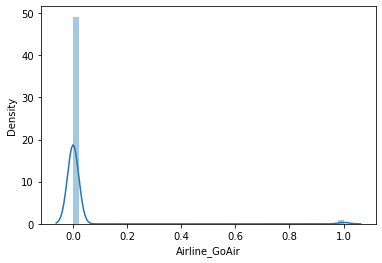

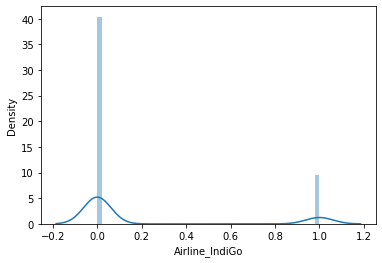

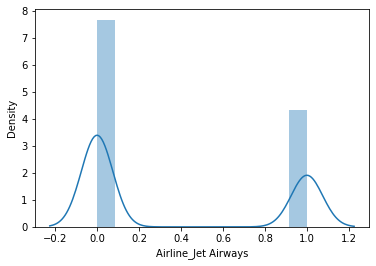

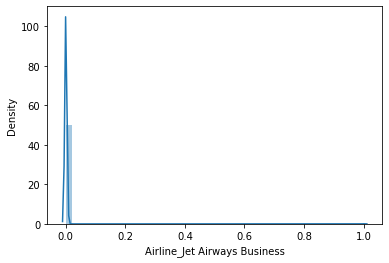

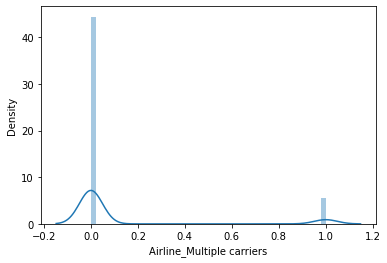

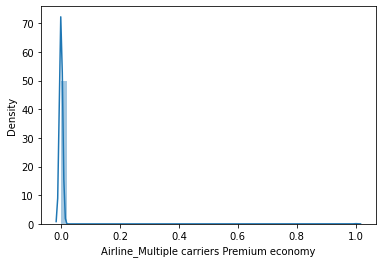

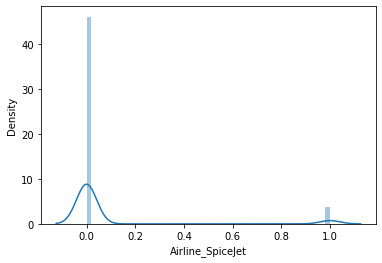

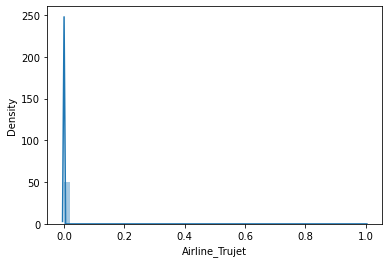

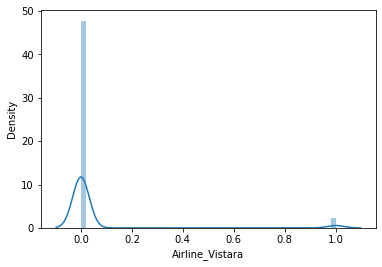

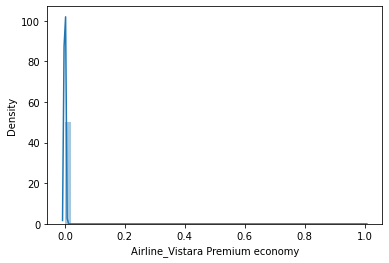

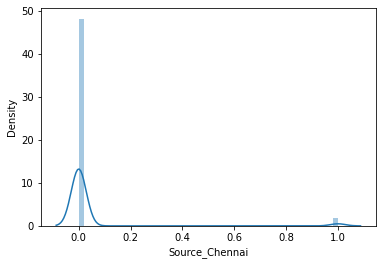

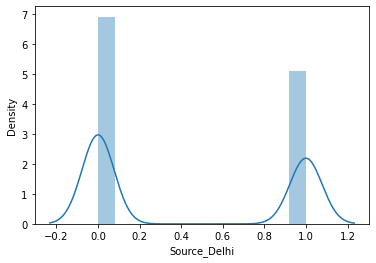

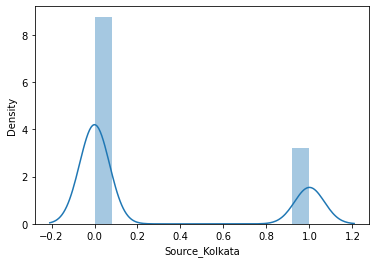

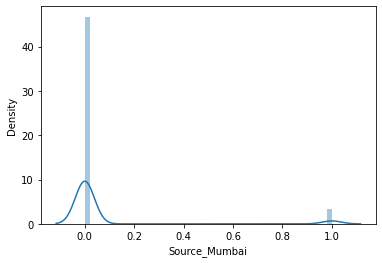

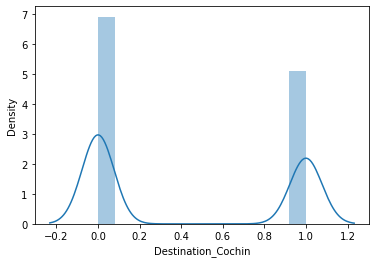

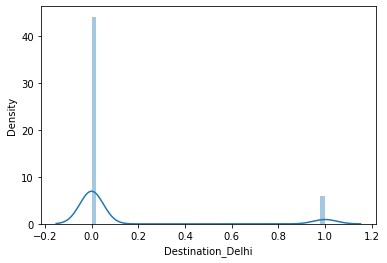

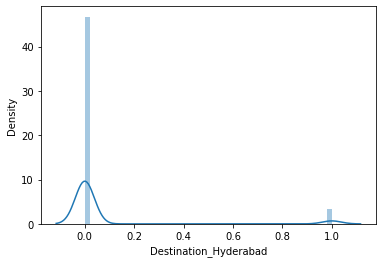

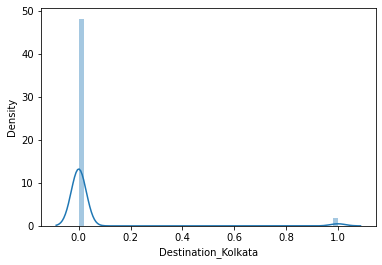

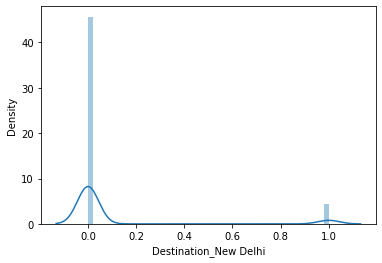

In [240]:

for  i in train_data.columns:
    plt.figure()
    sb.distplot(train_data[i])

In [241]:
train_data.skew()

Total_Stops                                    0.317109
Price                                          1.812405
Journey_day                                    0.118174
Journey_month                                 -0.387409
Dep_hour                                       0.112924
Dep_min                                        0.167234
Arrival_hour                                  -0.370146
Arrival_min                                    0.110945
Duration_hours                                 0.851197
Duration_mins                                 -0.090680
Airline_Air India                              1.815902
Airline_GoAir                                  7.217685
Airline_IndiGo                                 1.562601
Airline_Jet Airways                            0.581943
Airline_Jet Airways Business                  42.164359
Airline_Multiple carriers                      2.461548
Airline_Multiple carriers Premium economy     28.616840
Airline_SpiceJet                               3

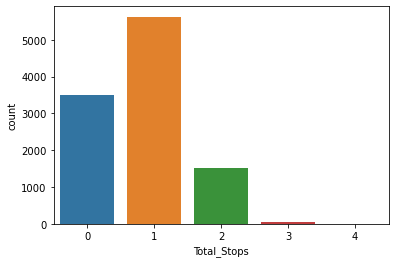

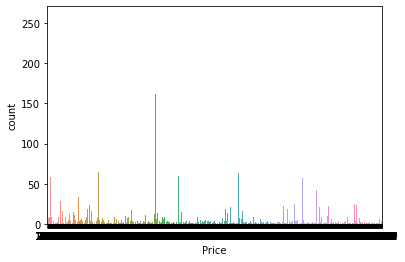

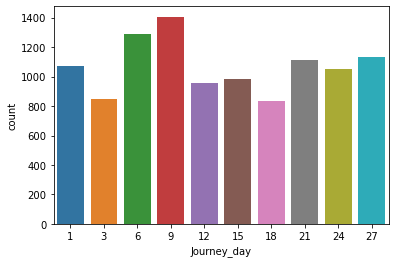

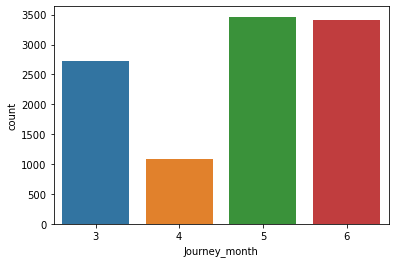

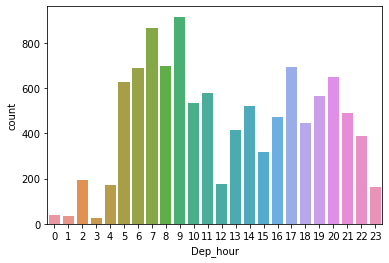

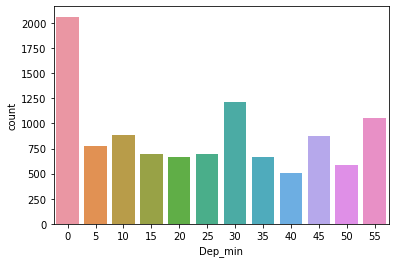

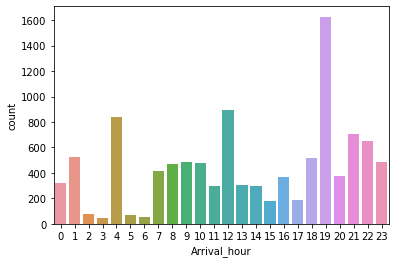

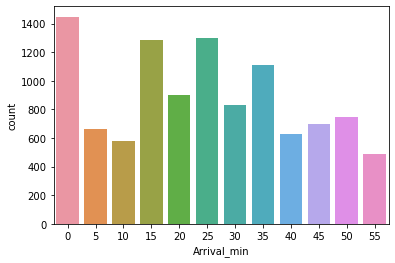

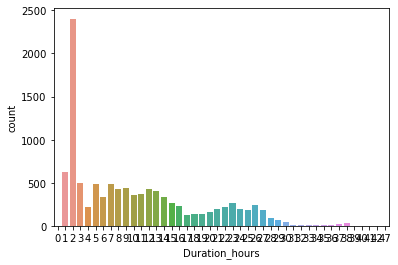

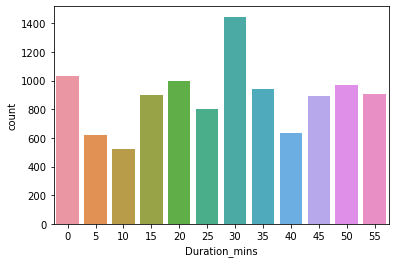

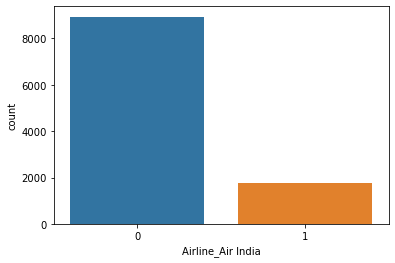

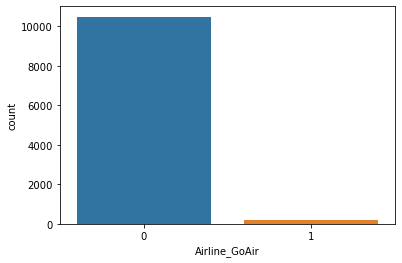

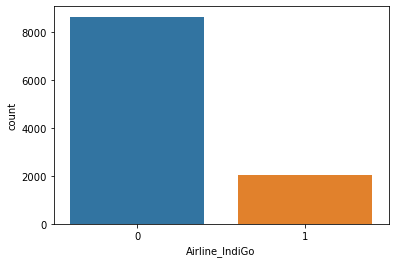

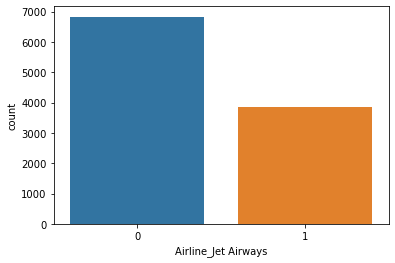

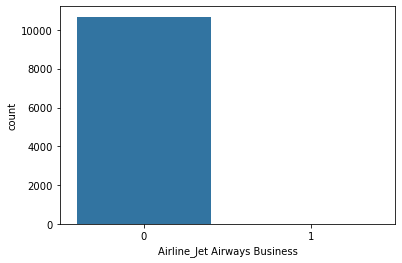

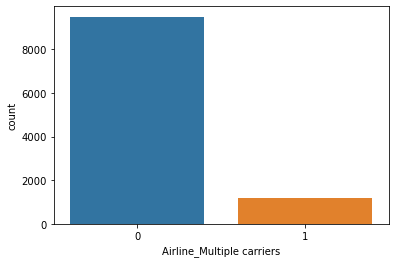

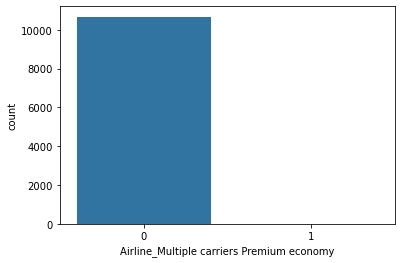

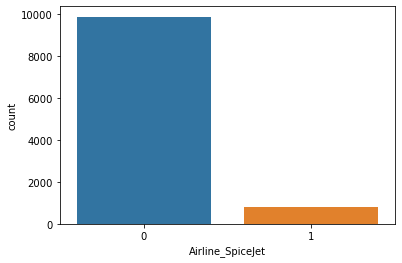

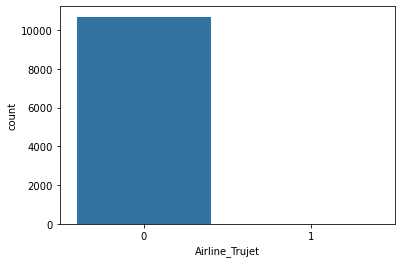

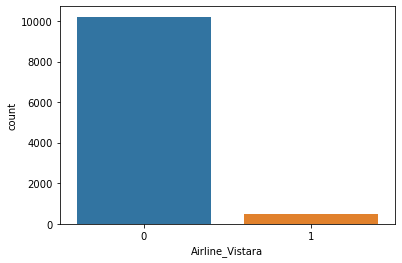

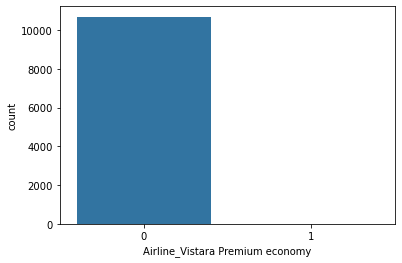

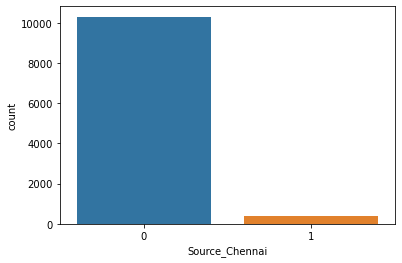

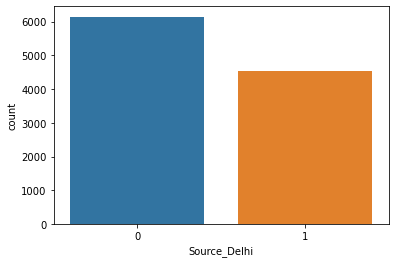

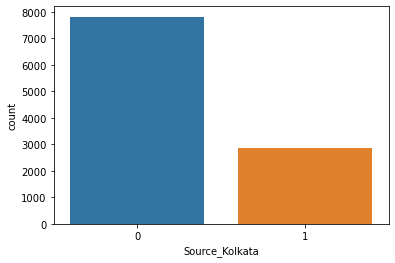

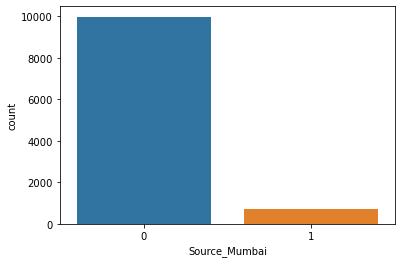

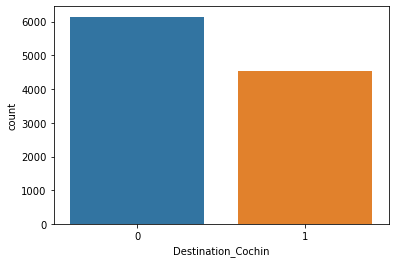

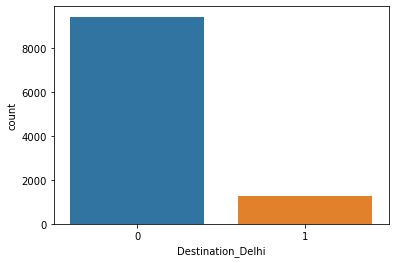

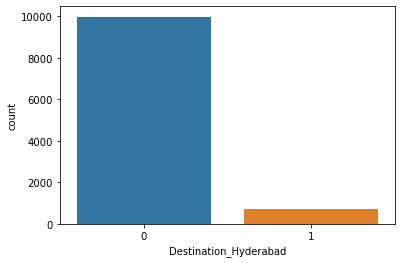

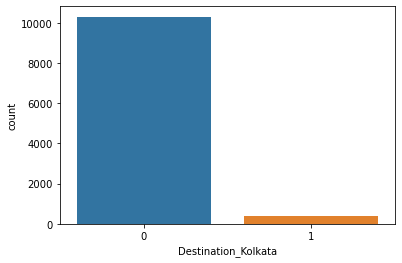

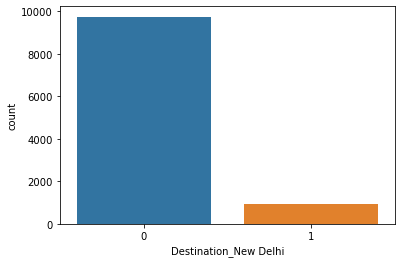

In [242]:

for  i in train_data.columns:
    plt.figure()
    sb.countplot(train_data[i]) 

In [ ]:

sb.countplot(x="Total_Stops",hue="Price",data=train_data)
plt.show()

In [260]:
train.describe()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


<AxesSubplot:>

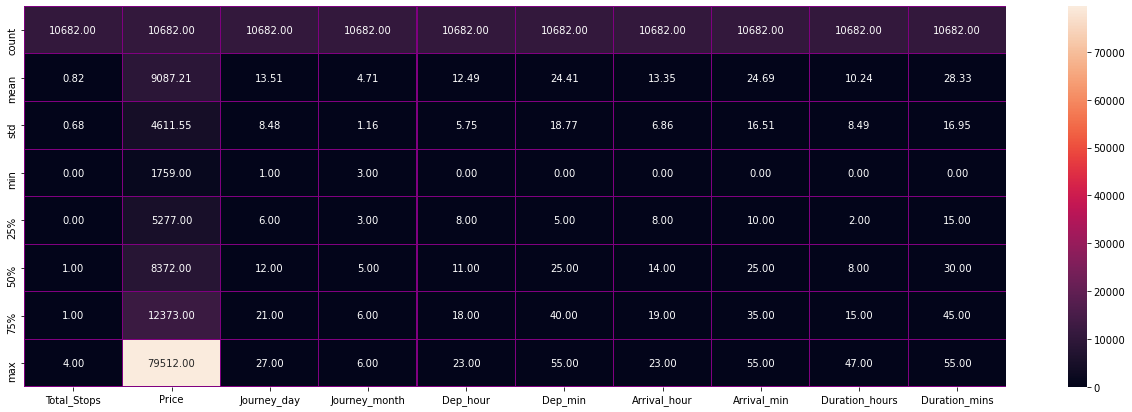

In [259]:
plt.figure(figsize=(22,7))
sb.heatmap(train.describe(),annot=True,linewidths=0.1,linecolor="purple",fmt="0.2f")

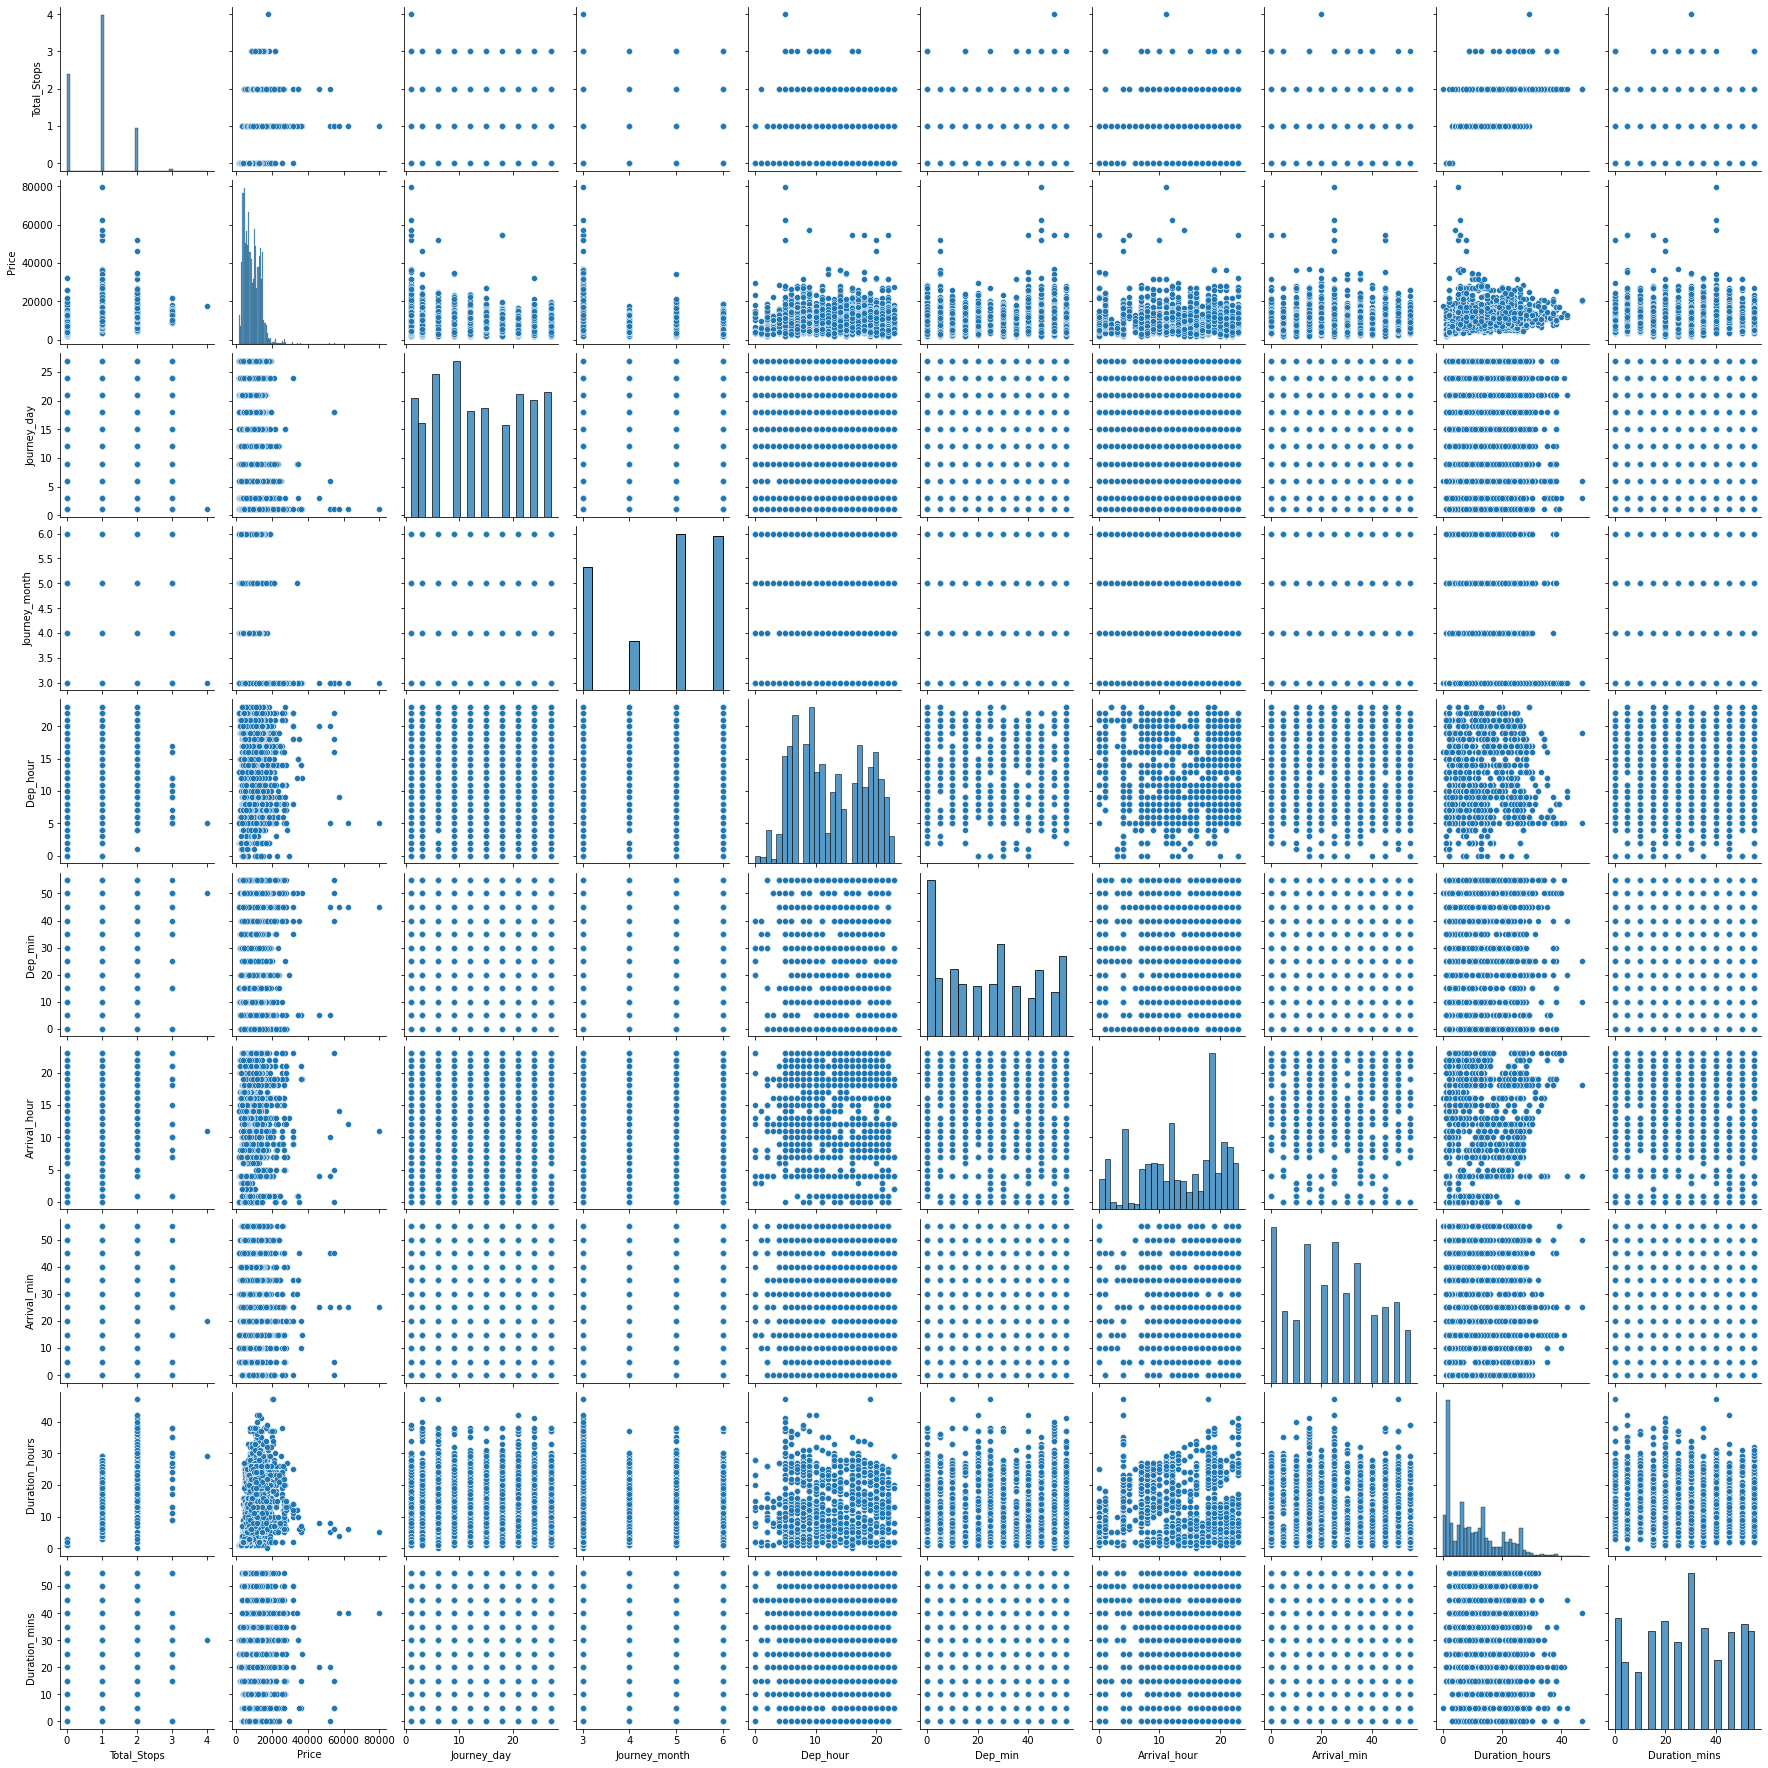

In [261]:
sb.pairplot(train)

In [215]:
test["Journey_day"]=pd.to_datetime(test.Date_of_Journey,format="%d/%m/%Y").dt.day
test["Journey_month"]=pd.to_datetime(test.Date_of_Journey,format="%d/%m/%Y").dt.month
test.drop(["Date_of_Journey"],axis=1,inplace=True)

In [216]:
test["Dep_hour"]=pd.to_datetime(test.Dep_Time).dt.hour
test["Dep_min"]=pd.to_datetime(test.Dep_Time).dt.minute
test.drop(["Dep_Time"],axis=1,inplace=True)

In [217]:
test["Arrival_hour"]=pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"]=pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"],axis=1,inplace=True)

In [218]:
#Assigning and converting Duration column into list

duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [219]:
test["Duration_hours"]=duration_hours
test["Duration_mins"]=duration_mins

In [220]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [221]:
Airline = test[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [222]:
Source = test[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [223]:
Destination= test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [224]:
Total_Stops= test[["Total_Stops"]]
Total_Stops = pd.get_dummies(Total_Stops, drop_first= True)
Total_Stops.head() 

,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,1


In [225]:
test.drop(["Route"],axis=1,inplace= True)

In [226]:
test.drop(["Additional_Info"],axis=1,inplace= True)

In [227]:
test.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,4h,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,13h,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,24,6,23,55,2,45,2,50


In [228]:
test["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [229]:
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [236]:
test_data_ = pd.concat([test, Airline, Source, Destination], axis = 1)

In [237]:
test_data_.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [238]:
test_data_

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,10h 55m,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,4h,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,23h 45m,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,13h,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2h 50m,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,23h 55m,1,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,2h 35m,0,27,3,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,6h 35m,1,6,3,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,15h 15m,1,6,3,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [262]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [263]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()

In [267]:
x=train_data.drop("Price",axis=1)
y=train_data["Price"]

In [268]:
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At the random state {i}, the Training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At the random state {i}, the Testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

At the random state 0, the Training accuracy is :- 0.6322112072126629
At the random state 0, the Testing accuracy is :- 0.5888639023134974


At the random state 1, the Training accuracy is :- 0.6287188290265426
At the random state 1, the Testing accuracy is :- 0.5997170005927523


At the random state 2, the Training accuracy is :- 0.6277444214047154
At the random state 2, the Testing accuracy is :- 0.6050793819556554


At the random state 3, the Training accuracy is :- 0.6303481361230805
At the random state 3, the Testing accuracy is :- 0.5918691376031036


At the random state 4, the Training accuracy is :- 0.6213162710503168
At the random state 4, the Testing accuracy is :- 0.630238845523011


At the random state 5, the Training accuracy is :- 0.6200031544805217
At the random state 5, the Testing accuracy is :- 0.6330796140516747


At the random state 6, the Training accuracy is :- 0.6235203472640667
At the random state 6, the Testing accuracy is :- 0.6213833055360356


At the random 

At the random state 66, the Training accuracy is :- 0.6318585076310865
At the random state 66, the Testing accuracy is :- 0.5918229166389933


At the random state 67, the Training accuracy is :- 0.625631611052305
At the random state 67, the Testing accuracy is :- 0.6115630377412724


At the random state 68, the Training accuracy is :- 0.622693977719645
At the random state 68, the Testing accuracy is :- 0.6253501060321068


At the random state 69, the Training accuracy is :- 0.6259848147566526
At the random state 69, the Testing accuracy is :- 0.6104435527904122


At the random state 70, the Training accuracy is :- 0.6299303216339724
At the random state 70, the Testing accuracy is :- 0.5934508911353061


At the random state 71, the Training accuracy is :- 0.6152882969194551
At the random state 71, the Testing accuracy is :- 0.6538075835003607


At the random state 72, the Training accuracy is :- 0.6307425557409576
At the random state 72, the Testing accuracy is :- 0.5899969804810612


A

In [269]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At the cross fold{j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At the cross fold2 the cv score is 0.6183722734703162 and accuracy score for training is 0.6227718917193439 and accuracy for the testing is 0.6251575694246299


At the cross fold3 the cv score is 0.6190349040445325 and accuracy score for training is 0.6227718917193439 and accuracy for the testing is 0.6251575694246299


At the cross fold4 the cv score is 0.6213062350335223 and accuracy score for training is 0.6227718917193439 and accuracy for the testing is 0.6251575694246299


At the cross fold5 the cv score is 0.6199027318916418 and accuracy score for training is 0.6227718917193439 and accuracy for the testing is 0.6251575694246299


At the cross fold6 the cv score is 0.6205586532826 and accuracy score for training is 0.6227718917193439 and accuracy for the testing is 0.6251575694246299


At the cross fold7 the cv score is 0.6195867852859552 and accuracy score for training is 0.6227718917193439 and accuracy for the testing is 0.6251575694246299


At the cross fold8 the cv score is 0.

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=57)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_lr=lr.predict(x_test)
print(r2_score(y_test,pred_lr))

0.6797926449118868


In [271]:
print("error:")

print("mean absolute error:",mean_absolute_error(y_test,pred_test))
print("mean squared error:",mean_squared_error(y_test,pred_test))

print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_test)))

error:
mean absolute error: 4461.495938057336
mean squared error: 35487634.94033884
root mean squared error: 5957.1499007779585


In [273]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=57)
rfr.fit(x_train,y_train)
pred_train=rfr.predict(x_train)
pred_rfr=rfr.predict(x_test)
print(r2_score(y_test,pred_rfr))


0.8233148533119001


In [275]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=39)
dtr.fit(x_train,y_train)
pred_train=dtr.predict(x_train)
pred_dtr=dtr.predict(x_test)
print(r2_score(y_test,pred_dtr))

0.6892000983087518


In [276]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=39)
knr.fit(x_train,y_train)
pred_train=knr.predict(x_train)
pred_knr=knr.predict(x_test)
print(r2_score(y_test,pred_knr))

0.5516283676740458


we see Random forest model giving a good r2 score

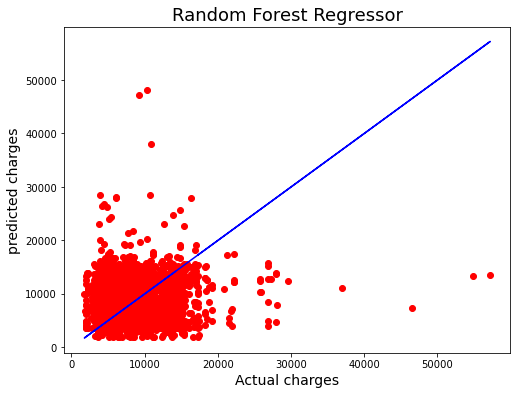

In [277]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rfr,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual charges",fontsize=14)
plt.ylabel("predicted charges", fontsize=14)
plt.title("Random Forest Regressor",fontsize=18)
plt.show()

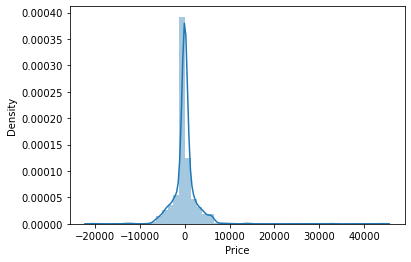

In [281]:
sb.distplot(y_test-pred_dtr)
plt.show()

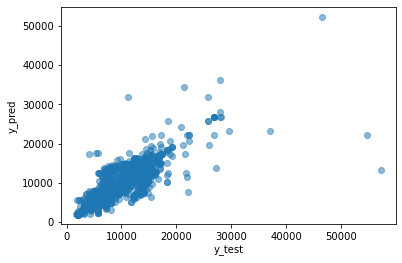

In [282]:
plt.scatter(y_test, pred_dtr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [295]:
from sklearn import metrics

In [284]:
print("error:")

print("mean absolute error:",mean_absolute_error(y_test,pred_rfr))
print("mean squared error:",mean_squared_error(y_test,pred_rfr))

print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_rfr)))

error:
mean absolute error: 4651.7596565608255
mean squared error: 37802877.25225241
root mean squared error: 6148.404447680097


In [285]:
parameters={"criterion":["mse","mae"],"max_features":["auto","sqrt","log2"]}
rfr=RandomForestRegressor()
clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [294]:
RandomForestRegressor(criterion="mse",max_features="auto")
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_decision=rfr.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("R2 Score",rfs*100)

rfscore=cross_val_score(rfr,x,y,cv=5)
rfc=rfscore.mean()  
print("Cross Val Score",rfc*100)

R2 Score 77.60185750561872
Cross Val Score 81.26737247838301


In [297]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=57)
rfr.fit(x_train,y_train)
pred_train=rfr.predict(x_train)
pred_rfr=rfr.predict(x_test)
print(r2_score(y_test,pred_rfr))

0.8223895469709251


In [298]:
import pickle
filename="flight.pkl"
pickle.dump(rfr,open(filename,"wb"))

In [299]:
loaded_model=pickle.load(open('flight.pkl',"rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.8223895469709251


In [300]:
Conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_rfr[:]],index=["predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [304]:
Conclusion.shape

(2, 2137)